<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

---

# 다중선형회귀(Multiple Linear Regression)

- 머신러닝모델을 만들 때 학습과 테스트 데이터를 분리 해야 하는 이유를 설명할 수 있습니다.
- 다중선형회귀를 이해하고 사용할 수 있습니다.
- 과적합/과소적합을 일반화 관점에서 설명할 수 있습니다.
- 편향/분산의 트레이트오프 개념을 이해하고 일반화 관점에서 설명할 수 있습니다.

## Warm up
복습
* 회귀모델을 만들 때 기준모델을 어떻게 정의하나요? 이 과정이 왜 중요할까요?
* 회귀분석이 무엇인지 간단하게 설명해 보세요.

다음 영상을 시청하세요.

- [How to Calculate R Squared Using Regression Analysis](https://youtu.be/w2FKXOa0HGA)
    - $R^2$ 값이 1에 가깝다는 것은 무엇을 의미하나요?

- [Standard Error of the Estimate used in Regression Analysis (Mean Square Error)
](https://youtu.be/r-txC-dpI-E)
    - MSE 구하는 방법을 잘 살펴 보세요.
    
- [Training and testing](https://youtu.be/P2NqrFp8usY)
    - 왜 훈련/테스트 데이터를 나누는 것일까요?

- [Machine Learning Fundamentals: Bias and Variance](https://youtu.be/EuBBz3bI-aA)
    - low bias, low variance 모델은 어떤 모델을 말하나요? 훈련/테스트세트를 사용해 설명해 보세요.


#### 이번 강의에서 새롭게 사용하는 그래픽 라이브러리 입니다. 간단히 설명만 살펴보세요.

* Plotly : ["Getting Started with Plotly in Python"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)


---

## 데이터를 학습/테스트 데이터로 나누어 봅시다.

#### 이전 강의에서와 같이 주택 가격 데이터를 사용해 보겠습니다.

In [1]:
## 단순회귀에서 데이터의 다양한 특성 중 하나만 사용해서 아쉬웠지만, 다중선형회귀는 다양한 특성을 사용할 수 있어 단순회귀에 비해 더 일반적인 모델이다. 

In [2]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')

In [3]:
## 컬럼명을 살펴봅시다.
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

이 데이터를 가지고 몇가지 회귀 모델을 만들어 보고, 모델의 성능을 평가하기 위해 훈련/테스트 데이터로 나누어 봅시다.

- 우리가 정말 관심있는것은 모델 학습에 사용한 **훈련(train) 데이터를 잘 맞추는 모델이 아니라, 학습에 사용하지 않은 테스트(test) 데이터를 얼마나 잘 맞추는지** 입니다.

- 데이터를 훈련/테스트 데이터로 나누어야 우리가 **만든 모델의 예측 성능을 제대로 평가**할 수 있습니다.

다시 강조하자면 **학습에 사용하는 데이터와 모델을 평가하는데 사용하는 데이터가 달라야 한다**는 의미입니다.

**그렇다면 데이터를 어떻게 나누어야 할까요?**

> 데이터를 무작위로 선택해 나누는 방법이 일반적이지만, 시계열 데이터를 가지고 과거에서 미래를 예측하려고 하는 경우 무작위로 데이터를 섞으면 절대로 안될것 입니다. 이때는 훈련 데이터 보다 테스트 데이터가 미래의 것이어야 할 것입니다.

> 반면에 시계열 데이터가 있다고 무조건 시간을 기준으로 데이터를 쪼개면 안된다. 문제에 따라 시간을 무시하고 무작위로 데이터를 뽑아낼 수도 있기 때문.

#### 그러면 데이터를 나누어 볼까요?

이 데이터는 시간/날짜에 관한 정보를 포함한 특성들이 있습니다. 하지만 우리는 시간변화에 상관없는 집값 예측이 목표이기 때문에 **무작위로 훈련/테스트 데이터셋**으로 나누어 보겠습니다.

In [4]:
## 데이터의 75% 갯수
len(df)*0.75 # 훈련 데이터의 갯수

1095.0

In [5]:
## train/test 데이터를 sample 메소드를 사용해 나누겠습니다.
train = df.sample(frac=0.75,random_state=1)
test = df.drop(train.index)

훈련/테스트 데이터셋이 어떻게 나뉘었는지 볼까요?

In [6]:
## head
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,...,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,...,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1,240,TA,TA,Y,262,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
288,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,...,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,...,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1233,1234,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,...,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [7]:
## train, test 길이 비교
len(train), len(test)

(1095, 365)

지금은 단순하게 데이터의 일정 부분을 테스트 셋으로 떼어 놓았습니다.
데이터셋을 준비했으니,

## 다중선형회귀모델을 학습해 봅시다.

이번에는 이전 강의에서 배운것 처럼
- 기준모델과 (특성 없음)
- 단순선형회귀 모델을 만들고 (특성 한 개 사용)
- 2 개 이상의 특성들을 사용하는 다중선형회귀모델을 만들어 봅시다.

### 기준모델

우선 **타겟인 SalePrice의 평균**을 기준모델로 사용해 보겠습니다. 

In [8]:
# SalePrice 평균
train['SalePrice'].mean()

180327.24200913243

In [9]:
# label 정의
target = 'SalePrice'
y_train = train[target]
y_test = test[target]

In [10]:
# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()

In [11]:
predict

180327.24200913243

In [12]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error #sklearn에 다양한 평가 지표가 사전에 함수로 정의되어 있다. 한 번 확인해보길!
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred) # 이전에는 MAE를 실제로 계산해서 사용했다.

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 57775.57


In [13]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

## 훈련과 테스트 에러가 소량의 차이가 있기 때문에 비슷한 수준이라고 볼 수 있다.

테스트 에러: 55862.90


### scikit-learn을 사용해서 단순선형회귀모델을 만들어 봅시다.

먼저 GrLivArea (지상생활면적, sqft)와 SalePrice를 사용, scatterplot을 그리고 OLS 라인을 그려 봅시다.

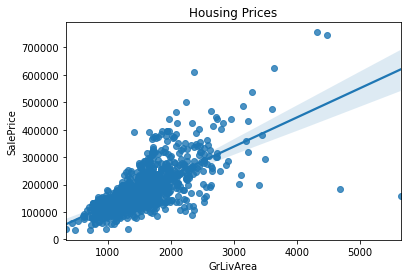

In [14]:
import seaborn as sns
sns.regplot(x=train['GrLivArea'], y=train['SalePrice']).set_title('Housing Prices');

이번에는 sklearn으로 단순선형회귀모델을 학습해 봅시다.

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['GrLivArea']
X_train = train[features]
X_test = test[features]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 38327.78


In [16]:
# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 35476.63


**기준모델과 비교해 보면 에러가 줄어든 것을 확인할 수 있습니다.**

### 다중선형회귀모델 학습 (특성 2개 이상)

우선 OverallQual 특성을 추가하여 그래프를 확인해 보겠습니다.

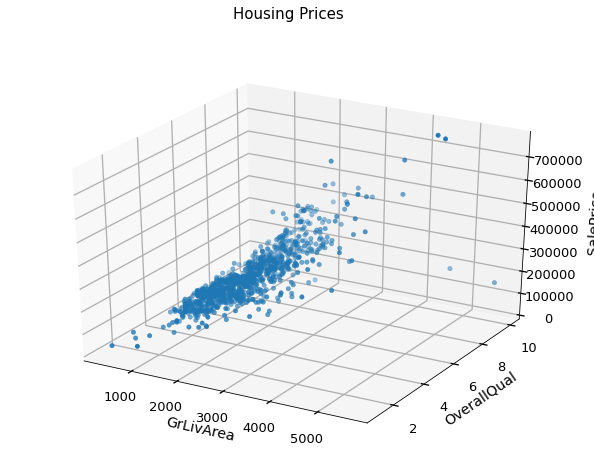

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(train['GrLivArea'], train['OverallQual'], train['SalePrice'])
ax.set_xlabel('GrLivArea', labelpad=12)
ax.set_ylabel('OverallQual', labelpad=10)
ax.set_zlabel('SalePrice', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

# (참고) plotly를 사용해서 상대적으로 간단히 그래프를 그릴 수도 있습니다.
# px.scatter_3d(
#     train,
#     x='GrLivArea', 
#     y='OverallQual', 
#     z='SalePrice',  
#     title='House Prices'
# )

scikit-learn을 사용해서 다중선형회귀 모델을 만들어 봅시다.

In [18]:
# 다중모델 학습을 위한 특성
features = ['GrLivArea', 
            'OverallQual'] ## 단순선형회귀 모델을 만들때와의 차이는 특성을 추가한 것 밖에 없다.
X_train = train[features]
X_test = test[features]

In [19]:
# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')


훈련 에러: 29129.58


In [20]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 27598.31


하나의 특성을 사용한 단순선형회귀모델보다 테스트 오류가 더 줄어든 것을 확인할 수 있습니다. 

#### 단순선형회귀 모델과 비교하면 어떤가요?

단순선형회귀에서는 모델이 직선의 방정식으로 표현이 되었다면, 이번에는 특성이 두 개이므로 평면의 방정식으로 표현이 됩니다.

Plotly를 사용하여 3D 평면을 표현해 보겠습니다.

matplotlib와 seaborn 보다 더 간단한 라이브러리

In [21]:
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import itertools

def surface_3d(df, f1, f2, target, length=20, **kwargs):
    """
    **함수의 입력값들에 대한 설명**
    2특성 1타겟 선형모델평면을 시각화 합니다.
    
    df : 데이터프레임
    f1 : 특성 1 열 이름
    f2 : 특성 2 열 이름
    target : 타겟 열 이름
    length : 각 특성의 관측치 갯수
    
    """
    
    # scatter plot(https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)
    plot = px.scatter_3d(df, x=f1, y=f2, z=target, opacity=0.5, **kwargs)
    
    # 다중선형회귀방정식 학습
    model = LinearRegression()
    model.fit(df[[f1, f2]], df[target])    

    # 좌표축 설정
    x_axis = np.linspace(df[f1].min(), df[f1].max(), length)
    y_axis = np.linspace(df[f2].min(), df[f2].max(), length)
    coords = list(itertools.product(x_axis, y_axis))
    
    # 예측
    pred = model.predict(coords)
    z_axis = pred.reshape(length, length).T
    
    # plot 예측평면
    plot.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='Viridis'))
    
    return plot

In [22]:
surface_3d(
    train,
    f1='GrLivArea', 
    f2='OverallQual', 
    target='SalePrice',  
    title='House Prices'
)

## plotly는 interact하게 확대하고 돌려보고 하는 기능을 제공한다.

## 회귀계수를 해석해 보고 모델을 평가해 봅시다

- 단순선형회귀식은 다음과 같았습니다: 
$y = \beta_0 + \beta_1 x $

- 지금 다룬 2특성의 다중선형회귀 식은 다음과 같습니다: 
$y = \beta_0 + \beta_1x_1 + \beta_2x_2$

- 계수들(coefficients or parameters) $\beta_0$~$\beta_2$ 는 어떻게 구할까요? 

In [23]:
## 절편(intercept)과 계수들(coefficients)
model.intercept_, model.coef_

(-102743.02342270731, array([   54.40145532, 33059.44199506]))

In [24]:
## 회귀식을 만들어 봅시다.
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -102743 + 54x₁ + 33059x₂


$\beta_1$과 $\beta_2$ 모두 양수입니다. 이것은 $x_1$, $x_2$이 증가할 때마다 $y$ 도 증가한다는 뜻입니다.
만약 음수인 경우에는 $y$ 가 감소한다는 뜻이겠지요.

$\beta_1$과 $\beta_2$의 절대값의 크기를 주의 깊게 보아야 한다. $\beta_2$가 더 큰 것을 알 수 있는데 그 뜻은 두 번째 특성이 타겟값에 훨씬 더 큰 영향을 준다는 것을 의미한다.  

한 번 가상의 관측 데이터를 넣어보고 모델이 어떻게 예측하는지 봅시다.

In [25]:
model.predict([[2000, 10]])

array([336654.30716253])

In [26]:
model.predict([[2000, 3]])

array([105238.21319714])

회귀계수를 통해 예측값을 설명할 수 있는 것이 선형모델의 강력한 장점이다.


선형회귀는 다른 ML 모델에 비해 상대적으로 학습이 빠르고 설명력이 강합니다. 하지만 선형 모델의 이므로 과소적합(underfitting)이 잘 일어난다는 단점이 있습니다. 과소적합에 대해서는 강의 뒷 부분에서 편향과 분산에 대해서 다룰 때 자세히 알아보겠습니다.

즉, 선형회귀 모델은 다른 모델에 비해 단순하기 때문에 복잡한 데이터를 충분히 학습하지 못할 수도 있다.

### 회귀모델을 평가하는 평가지표들(evaluation metrics)

만들어진 회귀모델을 평가하는데는 다음과 같은 평가지표들이 있습니다.

* MSE (Mean Squared Error) = 
$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
* MAE (Mean absolute error) = $\frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y_{i}} \right |$
* RMSE (Root Mean Squared Error) = 
$\sqrt{MSE}$
* R-squared(결정계수) (Coefficient of determination) = 
$1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}} = 1 - \frac{SSE}{SST} = \frac {SSR}{SST}$

- 참고
    - SSE(Sum of Squares `Error`, 관측치와 예측치 차이): $\sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}$
    - SSR(Sum of Squares due to `Regression`, 예측치와 평균 차이): $\sum_{i=1}^{n}(\hat{y_{i}} - \bar{y_{i}})^{2}$
    - SST(Sum of Squares `Total`, 관측치와 평균 차이): $\sum_{i=1}^{n}(y_{i} - \bar{y_{i}})^{2}$ , SSE + SSR


보통 MSE를 많이 사용한다. 
MSE의 단점: 제곱을 하기 때문에 단위 SCALE이 변해서 오류를 확인할 때 어느 정도 오류인지 확인하는데 어려움이 있다. **또한 이상치에 다른 지표들보다 민감하다??**

MAE: 제곱을 사용하지 않기 때문에 단위 scale이 변하지 않아서 오류를 확인할 때 직관적으로 확인할 수 있다.

RMSE: MSE의 단점을 개선한 방법

R-squared : 회귀모델의 설명력을 표현하는 지표 
          : 1에 가까울 수록 모델이 데이터에 대한 설명력이 높다라고 볼 수 있다.

각 평가지표의 차이를 살펴보기 위하여 간단한 데이터를 만들어 봅시다.

In [27]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

df_study = pd.DataFrame([[1, 2, 3], [2, 1, 3], [3, 3, 6], [4, 5, 9], [4, 4, 8], [5, 5, 10], [7, 7, 14], [9, 8, 17], [10, 9, 19], [10, 10, 20]])
df_study.columns = ['Q1','Q2','Total'] ## Q1과 Q2는 각각 다른 과목을 공부한 시간, Total은 두 시간을 더한 시간, 타켓 특성이 된다.

In [28]:
df_study

,Q1,Q2,Total
0,1,2,3
1,2,1,3
2,3,3,6
3,4,5,9
4,4,4,8
5,5,5,10
6,7,7,14
7,9,8,17
8,10,9,19
9,10,10,20


In [29]:
from IPython.display import display
from matplotlib.patches import Rectangle

def evaluation_metrics(df, feature, target, slope, intercept): # 여러 평가지표를 표현하고 각각 관측치에 대한 모델의 에러를 시각적으로 표현하기 위한 함수/단순선형회귀모델 사용 2차원에서 표시하기 위해
    """
    2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
    df : Pandas 데이터프레임
    feature : 특징 열
    target : 타겟 열
    slope : 선형방정식의 기울기
    intercept : 선형방정식의 y 절편
    """
    
    x = df[feature]
    y = df[target]
    
    # plot 데이터
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # 예측
    y_pred = slope * x + intercept
    
    # plot 예측
    ax.plot(x, y_pred)
    
    # Plot 제곱오차(MSE)
    x_left, x_right = ax.get_xlim() # x-axis view limits
    y_bottom, y_top = ax.get_ylim()
    scale = (x_right - x_left) / (y_top - y_bottom)

    for f, t, p in zip(x, y, y_pred):
        xy = (f, min(t, p))
        h = abs(t - p)
        w_scaled = h * scale
        ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
    # 회귀방정식 평가지표
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y, y_pred)

    display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,35.690000
1,MAE,5.280000
2,RMSE,5.974111
3,R2,0.000000


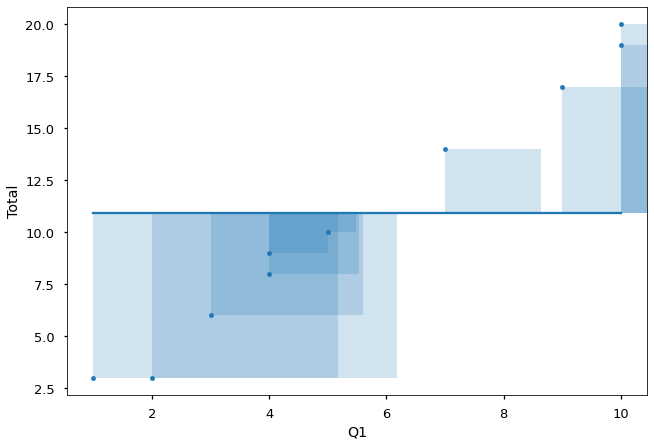

In [30]:
evaluation_metrics(df_study, 'Q1', 'Total', 0, df_study['Total'].mean()) # 기울기가 0 

Total 값의 평균을 회귀직선 으로 설정해 봅시다. $R^2$ 최소 값인 0 이 됩니다. 이 직선은 데이터를 전혀 설명하지 못하고 있네요.
$R^2$ 값이 1에 가까울 수록 데이터를 잘 설명하는 모델이 됩니다. 기울기와 절편를 수동적으로 조절하는 과정에서 $R^2$ 값이 음수가 나올 수도 있습니다만 이렇게 적합이 되면 안되겠지요.

이번에는 기울기를 조금 올려 보고 y절편도 조정해 보겠습니다. 에러가 많이 줄어드는 것을 볼 수 있습니다. $R^2$ 점수도 많이 올라 갔네요

,Metric,Score
0,MSE,8.400000
1,MAE,2.400000
2,RMSE,2.898275
3,R2,0.764640


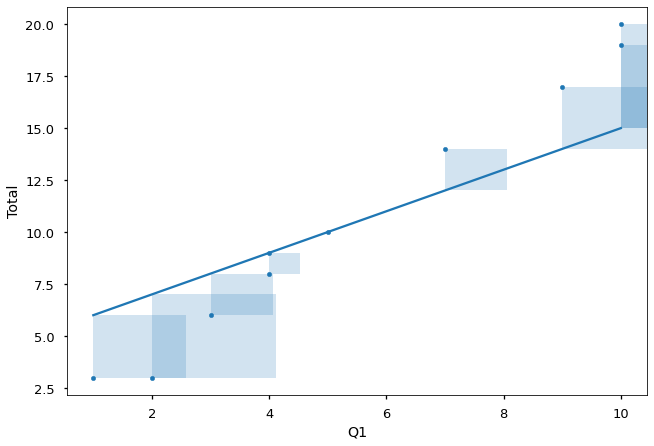

In [31]:
evaluation_metrics(df_study, 'Q1', 'Total', 1, 5)

조금 더 파라미터를 조정해 보겠습니다. 오차가 더 적어지고 $R^2$ 는 1에 매우 가까워 졌습니다.

,Metric,Score
0,MSE,0.500000
1,MAE,0.500000
2,RMSE,0.707107
3,R2,0.985990


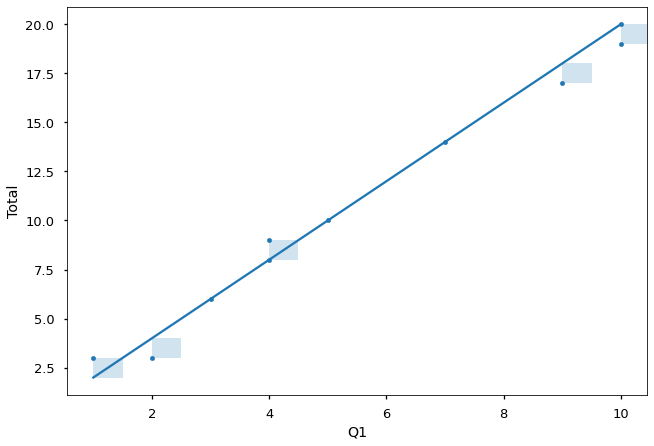

In [32]:
evaluation_metrics(df_study, 'Q1', 'Total', 2, 0) #데이터와 더 잘 맞도록 절편과 기울기를 조절

$R^2$ 외에, MAE는 단위 유닛이 같으므로 보다 해석에 용이한 장점이 있고, MSE는 제곱을 하기 때문에 특이값에 보다 민감 합니다. RMSE는 MSE를 실제값과 유사한 단위로 변화시켜주는 장점이 있습니다.
- [회귀의 오류지표 알아보기](https://partrita.github.io/posts/regression-error/)

In [33]:
import plotly.express as px
px.scatter(
    df_study,
    x='Q1',
    y='Total',
    trendline='ols' # ols = Ordinary Least Square : 데이터와 직선간의 거리가 최소가 되는 선을 찾는 방법
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## 과적합(Overfitting)과 과소적합(Underfitting)
다음 내용을 공부하기 전에 먼저 **일반화(generalization)** 라는 용어를 살펴보겠습니다.
- 테스트데이터에서 만들어내는 오차를 **일반화** 오차라고 부릅니다.
- 훈련데이터에서와같이 테스트데이터에서도 좋은 성능을 내는 모델은 **일반화가 잘 된 모델**이라고 부릅니다.
- 사실 수 많은 **머신러닝 모델들이 일반화를 잘하기 위한 방법론**이다.
- 꼭 기억해야 하는 것! 아무리 좋은 모델이라도 **데이터가 충분하지 않으면** 일반화를 하기 어렵다.
  - 모델을 튜닝하기 전에 질 좋은 데이터를 충분히 학습하는 것이 중요! 
- 모델이 너무 훈련데이터에 과하게 학습(과적합)을 하지 않도록 하는 많은 **일반화 방법**들이 있습니다.

우리는 당연히 예측모델이 훈련데이터에서보다 테스트데이터에서 오차가 적게 나오기를 기대합니다. 하지만 현실적으로 모든 데이터를 얻을 수 없기 때문에 훈련데이터로부터 일반화가 잘 되는 모델을 학습시켜야 합니다.

- **과적합**은 모델이 훈련데이터에만 특수한 성질을 과하게 학습해 일반화를 못해 결국 테스트데이터에서 오차가 커지는 현상을 말합니다
  - **과적합**은 모델이 필요 이상으로 복잡해져서 훈련 데이터의 노이즈 같은 일반적이지 않은 성질을 과하게 학습해서 테스트 데이터에서 오차가 커지는 현상. 즉, 일반화를 못하는 것이다.
- 반대로 **과소적합**은 훈련데이터에 과적합도 못하고 일반화 성질도 학습하지 못해, 훈련/테스트 데이터 모두에서 오차가 크게 나오는 경우를 말합니다.
  - **과소적합**은 모델이 필요한 것보다 너무 간단해서, 훈련 데이터가 갖는 일반적인 성질들을 충분히 학습하지 못해서, 훈련 데이터에서 조차도 나쁜 성능을 보여주는 현상
사실 머신러닝과정 중에서 과적합은 피할 수 없는 문제이고 완전히 극복할 수도 없습니다. 그래서 대부분 학습알고리즘은 이런 과적합을 완화시킬 수 있는 방법을 제공하기 때문에 잘 알아 두어야 하겠습니다.

### 분산/편향 트레이드오프
과/소적합은 오차의 편향(Bias)과 분산(Variance)개념과 관계가 있습니다.

일반화가 잘되는 모델을 만드는 것이 목적이라는 것을 알고 가자!
-> 테스트 데이터를 통해 일반화 오차를 측정할 수 있다.

결론만 우선 정리해 보면

- **분산이 높은**경우는, 모델이 학습 데이터의 노이즈에 민감하게 적합하여 테스트데이터에서 일반화를 잘 못하는 경우 즉 **과적합** 상태입니다.

- **편향이 높은**경우는, 모델이 학습 데이터에서, 특성과 타겟 변수의 관계를 잘 파악하지 못해 **과소적합** 상태입니다.

여기서 말하는 bias는 신경망이나 머신러닝 모델에서의 상수항(bias라고 부른다.)과는 다른 의미를 가진다.

#### 조금 더 자세하게 편향과 분산에 대한 식을 살펴보면,

MSE 식을 reducible, irreducible 에러로 나누어 표현하면 결국 Bias 에러 + Variance + irre 로 나뉘게 됩니다.([Bias–variance tradeoff
](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff))

${\displaystyle \operatorname {E} _{D}{\Big [}{\big (}y-{\hat {f}}(x;D){\big )}^{2}{\Big ]}={\Big (}\operatorname {Bias} _{D}{\big [}{\hat {f}}(x;D){\big ]}{\Big )}^{2}+\operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}+\sigma ^{2}(데이터의 노이즈, 데이터 자체의 에러)}$

${\displaystyle \operatorname {Bias} _{D}{\big [}{\hat {f}}(x;D){\big ]}=\operatorname {E} _{D}{\big [}{\hat {f}}(x;D){\big ]}-f(x)}$

${\displaystyle \operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}=\operatorname {E} _{D}[{\big (}\operatorname {E} _{D}[{\hat {f}}(x;D)]-{\hat {f}}(x;D){\big )}^{2}]}$

위의 식에서 시그마는 데이터의 노이즈, 데이터 자체의 에러이기 때문에 어떠한 모델을 사용해도 줄일 수 없다.

모델의 복잡도가 커질 수록(과적합) 편향 에러(웬만한 학습 데이터 설명 가능 정도)는 작아지고 분산 에러는 커진다.
반대로 모델의 복잡도가 작아질수록(과소적합) 편향 에러가 커지고 분산 에러가 작아진다.


#### 예를 들어 보겠습니다. 독립변수와 종속변수가 비선형관계인 모델로 학습을 해야 하는 데이터에서,

1) **단순선형모델로 학습**하는 경우와

2) 데이터 포인트를 모두 지나가도록 곡선 피팅이 가능한 **다항모델로 학습**을 진행한다고 가정해 보겠습니다.

선형모델 예측은 학습데이터에서 타겟값과 오차가 큽니다. 이를 **"편향이 높다"**고 합니다.(**과소적합**-데이터의 복잡도를 온전히 모델에 반영하지 못한다.)

하지만 훈련/테스트 두 데이터에서 그 오차가 비슷합니다 이를 **"분산이 낮다"**고 합니다. (오차는 여전히 많지만)

<img src="https://i.imgur.com/MMgbCfP.png" width="600"/>

<img src="https://i.imgur.com/ZuQBBBt.png" width="600"/>

곡선을 피팅한 모델에서는, 학습데이터에서 오차가 0에 가까우나(**"낮은 편향"**), 테스트 데이터에서 오차가 많아집니다.

이렇게 한 데이터세트에서는 오차가 적은데 다른 데이터 세트에서는 오차가 많이 늘어나는 현상
(데이터 세트의 종류에 따라 예측값 분산이 높을 때)을 **과적합**이라고 하며 **"분산이 높다"**라고 합니다.


<img src="https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png" width="600" />

<img src="https://i.imgur.com/r1kNImu.png" width="450" />

- [The Dangers of Under-fitting and Over-fitting](https://medium.com/analytics-vidhya/the-dangers-of-under-fitting-and-over-fitting-495f9efa1847)

만들기 어렵지만, 편향도 적고 분산도 적은 모델이 좋은 모델입니다.

우리가 어떤 모델을 학습시키든 훈련/테스트 데이터에서의 모델의 성능과 그 차이를 보고 과적합과 과소적합을 적절하게 구분해 낼 수 있는 것이 중요하겠습니다.

추가적으로 몇가지 다른 그림을 더 살펴 보겠습니다.
다음 그림은 높은 편향을 가지는 모델(과소적합), 높은 분산을 가지는 모델(과적합)을 비교하고 있습니다.

[Python Data Science Handbook,_ Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off).

>![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance-2.png)


> <img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png"/>

모델의 복잡성에 따라 성능 그래프를 그려 보면, 모델이 복잡해질 수록 훈련데이터 성능은 계속 증가하는데 검증데이터 성능은 어느정도 증가하다가 증가세가 멈추고 오히려 낮아지는 지점을 찾을 수 있습니다. 우리는 보통 **이 시점**을 **과적합**이 일어나는 시점으로 파악하고 더 복잡한 모델은 불필요함을 알게 됩니다.

>이러한 그래프를 잘 해석해야 한다. 그래프를 보면, 모델의 복잡도가 커질 수록 훈련 데이터에서의 score는 계속 좋아지지만 테스트나 검증 데이터의 스코어는 증가하다가 감소하는 경향을 보인다. 

>High Variance : 두 데이터 간의 오차가 너무 커진다. 과적합이 커지는 것이라고도 한다. 이 때는 모델의 복잡도를 더 늘리는 것은 불필요하다.

여러분은 앞으로 더 많은 features를 사용하고 여러 모델들을 배우고 사용하게 될 텐데 과적합/과소적합에 대한 내용은 계속 숙지하셔야 할 것입니다. feature들이 많아지면 모델의 복잡도가 높아진다. 

### 다항회귀모델을 사용해서 과적합을 만들어 봅시다.
마지막으로, 독립변수와 타겟변수 사이에 비선형 관계를 학습할 수 있는 다항회귀모델(polynomial regression)의 차수(degrees)를 조정해 회귀곡선을 만들어보는 실험을 해보겠습니다.

In [34]:
# 실험에 사용할 랜덤 데이터를 만듭니다 (30, 2)
rng = np.random.RandomState(1) 
data = np.dot(rng.rand(2, 2), rng.randn(2, 30)).T  #rand 함수 : 0~1 사이의 값을 균일하게 출력, randn 함수: 평균이 0, 표준편차가 1인 정규분포에서 난수를 생성하는 함수
X = pd.DataFrame([i[0] for i in data])
y = pd.DataFrame([i[1] for i in data])

이번에는 훈련, 테스트셋을 scikit-learn을 사용해 나누어 보겠습니다. [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [35]:
from sklearn.model_selection import train_test_split

## X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
from sklearn.preprocessing import PolynomialFeatures # 다중회귀모델에 다항적인 특성을 추가하기 위한 함수(PolynomialFeatures) / 회귀 모형에 제곱, 세제곱 등 그런 다항식을 추가한 회귀방정식을 만들기 위해 사용
X1 = np.arange(6).reshape(3, 2)
print(X1)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X1)

# poly = PolynomialFeatures(interaction_only=True)
# poly.fit_transforim(X)


[[0 1]
 [2 3]
 [4 5]]


Sklearn의 **PolynomialFeatures**는 다항회귀모델을 쉽게 구현하도록 도와줍니다.
이름에서 알 수 있듯이 다항 특성(polynomial features)을 방정식에 추가하는 것 입니다. 다항 특성은 특성들의 상호작용을 보여줄 수 있기 때문에 상호작용특성(interaction features)라고도 부릅니다.

예를들어 $x_1$, $x_2$ 두 특성을 가진 데이터가 입력으로 들어오면 이것을 기준으로 degree=2 인 새로운 특성을 만들어 내는데 즉 특성이 다음과 같이 변합니다.
($x_1$, $x_2$) -> (1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$)

degree = 3 인 경우는 특성이 더 많아 지겠지요?

**다항회귀 자체는 종속변수와 독립변수가 비선형인 관계인 모델이지만, 다항항들은 선형결합으로 연결이 되어 있다고 볼 수 있기 때문에 다중선형회귀 형태로 만들 수 있다.** 뭔솔?

**비선형 회귀 모델은 최소 제곱으로 fitting할 수 없는 모델 / 독립변수가 아닌 회귀변수가 비선형일경우에 비선형 회귀 모델이라고 한다.** 뭔솔?



In [37]:
## X_poly: [1, a, b, a^2, ab, b^2]
X_poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

모델의 복잡도를 계속 올려 보겠습니다. 스코어를 눈여겨 봐 주세요.
- [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn)

Degree=1


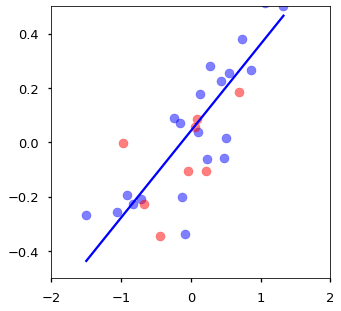

Degree=3


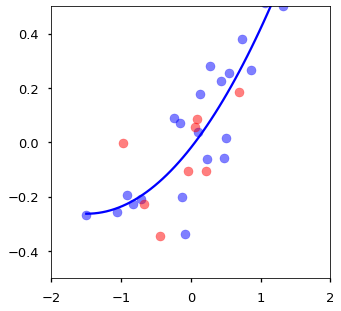

Degree=4


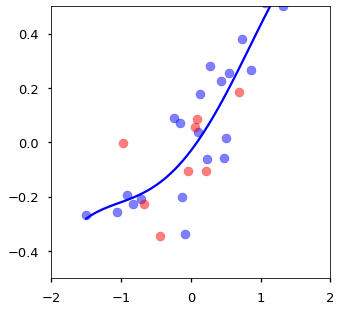

Degree=6


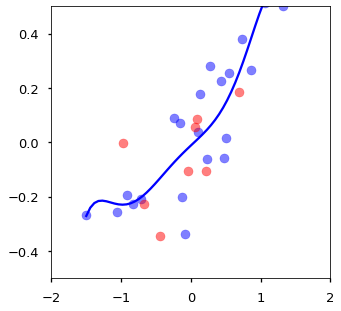

Degree=10


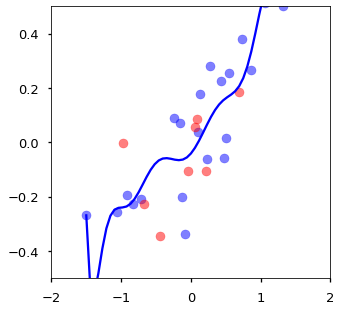

Degree=20


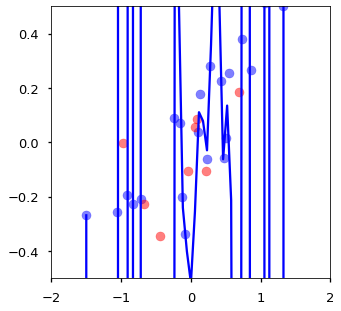

In [38]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,5)

# 다항회귀모델도 결국 다중선형회귀모델로 변형하여 모델을 만들 수 있는 선형모델입니다.
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = [1, 3, 4, 6, 10, 20]
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    print(f'Degree={degree}')
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    

    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.axis([-2., 2.0, -0.5, 0.5])
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

모델 복잡도가(차수) 올라갈 수록 과적합 되어 훈련 $R^2$ 값이 좋아지지만 테스트 $R^2$ 값은 줄어드는 것을 확인 할 수 있습니다.

## 참고자료

#### plotly
- [plotly API reference](https://plotly.github.io/plotly.py-docs/index.html)

#### 훈련/테스트 세트 분리
- [Forecasting,Chapter 3.4](https://otexts.com/fpp2/accuracy.html)
- [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

#### Bias-Variance Tradeoff

- [Bias/Variance](https://youtu.be/SjQyLhQIXSM)
- [Machine Learning Fundamentals: Bias and Variance](https://youtu.be/EuBBz3bI-aA)
- [The Bias-Variance Tradeoff](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9)
- [Python Data Science Handbook,Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)

#### Regression
- [5 step process](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- [Scikit-Learn LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Sum of Squares](https://corporatefinanceinstitute.com/resources/knowledge/other/sum-of-squares/)
- [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- [상관계수 & 결정계수](https://m.blog.naver.com/istech7/50153288534)
- [회귀의 오류지표 알아보기](https://partrita.github.io/posts/regression-error/)
